In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [4]:
df = web.DataReader('TATAPOWER.NS', data_source='yahoo',start='2012-01-01', end='2022-02-16')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,85.886528,83.039726,84.921509,85.066261,2346043.0,67.762993
2012-01-03,89.698341,85.404015,86.272537,89.408836,2848274.0,71.222237
2012-01-04,90.518608,87.720062,89.746597,88.685074,1463473.0,70.645714
2012-01-05,91.049370,88.395569,89.264084,90.422112,2073520.0,72.029411
2012-01-06,91.676628,86.948044,90.615112,88.588577,3749013.0,70.568832
...,...,...,...,...,...,...
2022-02-10,244.500000,234.100006,238.500000,241.300003,55153254.0,241.300003
2022-02-11,242.050003,230.199997,240.000000,232.300003,36050888.0,232.300003
2022-02-14,226.850006,216.000000,226.000000,220.500000,38301829.0,220.500000


In [5]:
data = df.filter(['Close'])
dataset=data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1998

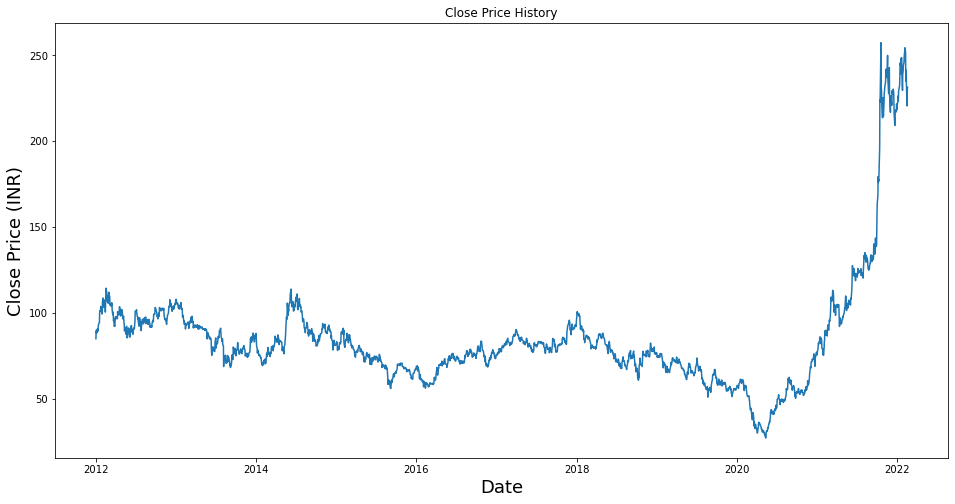

In [7]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (INR)',fontsize=18)
plt.show()

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.25115767],
       [0.27003844],
       [0.26689164],
       ...,
       [0.84000005],
       [0.8830435 ],
       [0.88717399]])

In [9]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.25115767, 0.27003844, 0.26689164, 0.27444398, 0.26647209,
       0.27297545, 0.2757027 , 0.27024824, 0.27696142, 0.2847235 ,
       0.29101708, 0.29164644, 0.29185622, 0.31724037, 0.32185569,
       0.32185569, 0.33297434, 0.32374377, 0.32206547, 0.313674  ,
       0.31724037, 0.34346367, 0.34786918, 0.35416276, 0.33192543,
       0.33087649, 0.33444287, 0.34891812, 0.34619091, 0.33444287,
       0.31849909, 0.3443028 , 0.35940744, 0.37912734, 0.36591081,
       0.34640068, 0.34954748, 0.35877808, 0.34094623, 0.35185514,
       0.36339337, 0.36884782, 0.36255424, 0.35751937, 0.33612114,
       0.3384288 , 0.33717008, 0.33297434, 0.33486242, 0.34220495,
       0.34136581, 0.32416332, 0.31178592, 0.31661102, 0.31828932,
       0.29710089, 0.29919875, 0.28241584, 0.2847235 , 0.28283542])]
[0.28933878140683955]



In [10]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(1938, 60, 1)

In [12]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [14]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1938/1938 [==============================] - 35s 17ms/step - loss: 3.5668e-04


In [15]:
test_data = scaled_data[training_data_len-60: , :]
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [16]:
x_test = np.array(x_test)

In [17]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [18]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [19]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.6094917840135838

C:\Users\kapoo\AppData\Local\Temp/ipykernel_9344/2133332622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


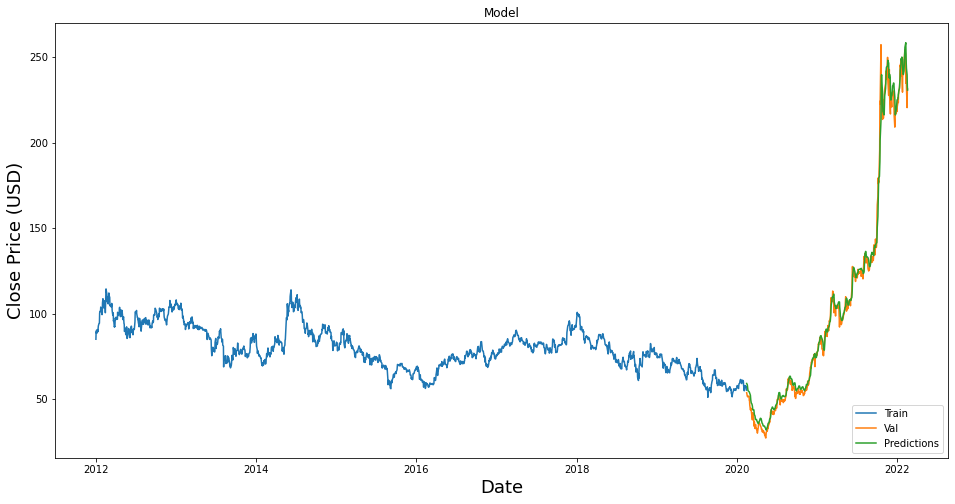

In [20]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc ='lower right')
plt.show()

In [21]:
valid

,Close,Predictions
Date,,
2020-02-14,53.799999,59.220573
2020-02-17,51.750000,58.427197
2020-02-18,51.549999,57.202610
2020-02-19,51.349998,56.007767
2020-02-20,51.599998,55.049221
...,...,...
2022-02-10,241.300003,246.704926
2022-02-11,232.300003,243.607697
2022-02-14,220.500000,239.664001


In [22]:
ttp_quote = web.DataReader('TATAPOWER.NS', data_source='yahoo',start='2012-01-01', end='2022-02-16')
new_df = ttp_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[231.13066]]


In [23]:
ttp_quote2 = web.DataReader('TATAPOWER.NS', data_source='yahoo',start='2022-02-10', end='2022-02-18')
print(ttp_quote2['Close'])

Date
2022-02-10    241.300003
2022-02-11    232.300003
2022-02-14    220.500000
2022-02-15    230.399994
2022-02-16    231.350006
2022-02-17    227.750000
2022-02-18    228.800003
Name: Close, dtype: float64
